In [2]:
1+1

2

In [3]:
# increase cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import random
import time
import pickle
import gc
import re
import itertools

import numpy as np
import pandas as pd

from importlib import reload

import scipy.sparse

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from helpers import load_data
from helpers import explore_data
from helpers import preprocess_data
from helpers import train_model

### Load validation predicted probabilities

In [6]:
main_dir = '/tf/notebooks/'

In [7]:
probs_path = main_dir+'final-project/Classification/data/gender'

In [8]:
with open(os.path.join(probs_path, 'val_pred_probs_mlp_ngram'), 'rb') as fp:
    val_pred_probs_mlp_ngram = pickle.load(fp)
with open(os.path.join(probs_path, 'val_pred_probs_cnn_use'), 'rb') as fp:
    val_pred_probs_cnn_use = pickle.load(fp)

In [9]:
val_pred_probs_mlp_use_aggr_chunk = np.load(os.path.join(probs_path, 'val_pred_probs_mlp_use_aggr_chunk.npy'))
val_pred_probs_cnn = np.load(os.path.join(probs_path, 'val_pred_probs_cnn.npy'))
val_pred_probs_cnn_aggr_chunk = np.load(os.path.join(probs_path, 'val_pred_probs_cnn_aggr_chunk.npy'))
val_pred_probs_sep = np.load(os.path.join(probs_path, 'val_pred_probs_sep.npy'))

In [10]:
len(val_pred_probs_mlp_ngram), len(val_pred_probs_mlp_use_aggr_chunk), len(val_pred_probs_cnn), len(val_pred_probs_cnn_aggr_chunk), len(val_pred_probs_cnn_use), len(val_pred_probs_sep)

(62716, 62716, 62716, 62716, 62716, 62716)

In [11]:
with open(os.path.join(probs_path, 'val_ids'), 'rb') as fp:
    val_ids = pickle.load(fp)
with open(os.path.join(probs_path, 'val_target'), 'rb') as fp:
    val_target = pickle.load(fp)
with open(os.path.join(probs_path, 'val_list'), 'rb') as fp:
    val_list = pickle.load(fp)

In [12]:
len(val_ids), len(val_target), len(val_list)

(62716, 62716, 62716)

In [13]:
val_preds_mlp_ngram = val_pred_probs_mlp_ngram > 0.5
val_preds_mlp_use_aggr_chunk = val_pred_probs_mlp_use_aggr_chunk > 0.5
val_preds_cnn = val_pred_probs_cnn > 0.5
val_preds_cnn_aggr_chunk = val_pred_probs_cnn_aggr_chunk > 0.5
val_preds_cnn_use = val_pred_probs_cnn_use > 0.5
val_preds_sep = val_pred_probs_sep > 0.5

In [14]:
classes = ['Male', 'Female']

Confusion matrix, without normalization
[[23166  8192]
 [ 7216 24142]]
              precision    recall  f1-score   support

        Male       0.76      0.74      0.75     31358
      Female       0.75      0.77      0.76     31358

   micro avg       0.75      0.75      0.75     62716
   macro avg       0.75      0.75      0.75     62716
weighted avg       0.75      0.75      0.75     62716



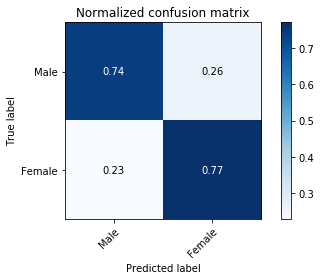

In [15]:
explore_data.plot_confusion_matrix(val_target, val_preds_mlp_ngram, classes, normalize=True)

Confusion matrix, without normalization
[[22896  8462]
 [11770 19588]]
              precision    recall  f1-score   support

        Male       0.66      0.73      0.69     31358
      Female       0.70      0.62      0.66     31358

   micro avg       0.68      0.68      0.68     62716
   macro avg       0.68      0.68      0.68     62716
weighted avg       0.68      0.68      0.68     62716



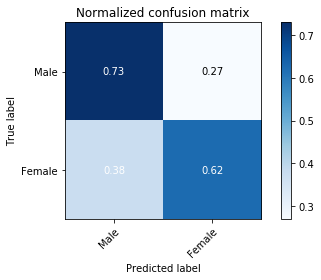

In [16]:
explore_data.plot_confusion_matrix(val_target, val_preds_mlp_use_aggr_chunk, classes, normalize=True)

Confusion matrix, without normalization
[[23147  8211]
 [ 8317 23041]]
              precision    recall  f1-score   support

        Male       0.74      0.74      0.74     31358
      Female       0.74      0.73      0.74     31358

   micro avg       0.74      0.74      0.74     62716
   macro avg       0.74      0.74      0.74     62716
weighted avg       0.74      0.74      0.74     62716



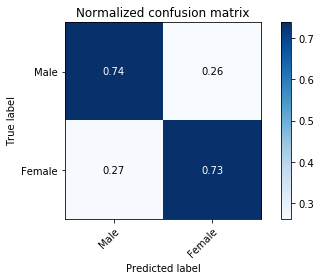

In [17]:
explore_data.plot_confusion_matrix(val_target, val_preds_cnn, classes, normalize=True)

Confusion matrix, without normalization
[[23697  7661]
 [ 8394 22964]]
              precision    recall  f1-score   support

        Male       0.74      0.76      0.75     31358
      Female       0.75      0.73      0.74     31358

   micro avg       0.74      0.74      0.74     62716
   macro avg       0.74      0.74      0.74     62716
weighted avg       0.74      0.74      0.74     62716



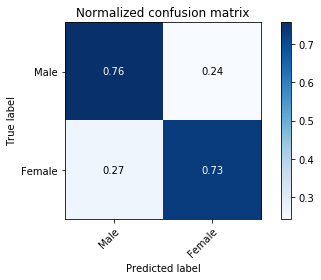

In [18]:
explore_data.plot_confusion_matrix(val_target, val_preds_cnn_aggr_chunk, classes, normalize=True)

Confusion matrix, without normalization
[[20474 10884]
 [ 8951 22407]]
              precision    recall  f1-score   support

        Male       0.70      0.65      0.67     31358
      Female       0.67      0.71      0.69     31358

   micro avg       0.68      0.68      0.68     62716
   macro avg       0.68      0.68      0.68     62716
weighted avg       0.68      0.68      0.68     62716



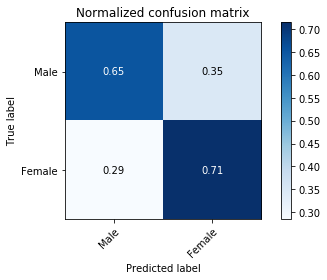

In [19]:
explore_data.plot_confusion_matrix(val_target, val_preds_cnn_use, classes, normalize=True)

Confusion matrix, without normalization
[[22936  8422]
 [ 8575 22783]]
              precision    recall  f1-score   support

        Male       0.73      0.73      0.73     31358
      Female       0.73      0.73      0.73     31358

   micro avg       0.73      0.73      0.73     62716
   macro avg       0.73      0.73      0.73     62716
weighted avg       0.73      0.73      0.73     62716



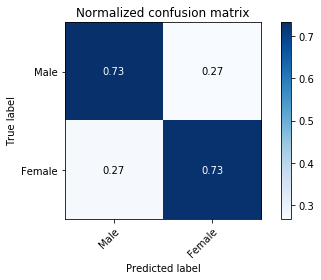

In [20]:
explore_data.plot_confusion_matrix(val_target, val_preds_sep, classes, normalize=True)

### Merging predictions with descriptions

In [21]:
descr_df = pd.read_csv(main_dir+'final-project/data/QA/full_descr.txt', sep="|", index_col=0)
descr_df = descr_df.loc[np.asarray(val_ids, dtype=int)]
descr_df.shape

/usr/local/lib/python3.5/dist-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


(62716, 16)

In [22]:
descr_df.reset_index(inplace=True)

In [23]:
descr_df.head()

,speech_id,date,char_count,word_count,speakerid,Party,Congress,Chamber,State,Ethnicity,Age,Age_lt_med,NonWhite,Female,speaker,Full Name,match
0,1080099024,20031030,436,70,108118820.0,D,108,H,CA,W,66.0,0.0,0.0,1.0,Mrs. CAPPS,"CAPPS, LOIS",fuzzy
1,1080165561,20040625,6213,1056,108120190.0,D,108,H,CA,B,58.0,0.0,1.0,1.0,Ms. LEE,"LEE, BARBARA",fuzzy
2,1090156218,20060711,1230,198,109116060.0,D,109,H,CA,H,49.0,1.0,1.0,1.0,Ms. SOLIS,"SOLIS, HILDA",exact
3,1060121740,20000315,700,136,106117690.0,D,106,H,NY,W,56.0,0.0,0.0,1.0,Mrs. McCARTHY of New York,"MCCARTHY, CAROLYN",exact
4,1100177577,20080623,3302,490,110114720.0,R,110,H,VA,W,59.0,0.0,0.0,1.0,Mrs. DRAKE,"DRAKE, THELMA",exact


In [24]:
pred_df = pd.DataFrame({'ids': np.asarray(val_ids, dtype=np.int64), 
                        'pred_probs_mlp_ngram': val_pred_probs_mlp_ngram.flatten(), 
                        'pred_probs_mlp_use': val_pred_probs_mlp_use_aggr_chunk.flatten(), 
                        'pred_probs_cnn': val_pred_probs_cnn.flatten(),
                        'pred_probs_cnn_chunk': val_pred_probs_cnn_aggr_chunk.flatten(),
                        'pred_probs_cnn_use': val_pred_probs_cnn_use.flatten(),
                        'pred_probs_sep': val_pred_probs_sep.flatten()})
pred_df.shape

(62716, 7)

In [25]:
pred_df.head()

,ids,pred_probs_cnn,pred_probs_cnn_chunk,pred_probs_cnn_use,pred_probs_mlp_ngram,pred_probs_mlp_use,pred_probs_sep
0,1080099024,0.617424,0.563669,0.609537,0.731255,0.587049,0.629989
1,1080165561,0.850616,0.539413,0.710215,0.991329,0.616921,0.733058
2,1090156218,0.934120,0.765542,0.959096,0.884531,0.725295,0.882182
3,1060121740,0.775628,0.592252,0.732315,0.643061,0.611563,0.772252
4,1100177577,0.506378,0.496121,0.696529,0.609319,0.509501,0.522985


In [27]:
descr_pred_df = descr_df.merge(pred_df, left_on='speech_id', right_on='ids')
descr_pred_df.shape

(62716, 24)

In [28]:
descr_pred_df.head()

,speech_id,date,char_count,word_count,speakerid,Party,Congress,Chamber,State,Ethnicity,...,speaker,Full Name,match,ids,pred_probs_cnn,pred_probs_cnn_chunk,pred_probs_cnn_use,pred_probs_mlp_ngram,pred_probs_mlp_use,pred_probs_sep
0,1080099024,20031030,436,70,108118820.0,D,108,H,CA,W,...,Mrs. CAPPS,"CAPPS, LOIS",fuzzy,1080099024,0.617424,0.563669,0.609537,0.731255,0.587049,0.629989
1,1080165561,20040625,6213,1056,108120190.0,D,108,H,CA,B,...,Ms. LEE,"LEE, BARBARA",fuzzy,1080165561,0.850616,0.539413,0.710215,0.991329,0.616921,0.733058
2,1090156218,20060711,1230,198,109116060.0,D,109,H,CA,H,...,Ms. SOLIS,"SOLIS, HILDA",exact,1090156218,0.934120,0.765542,0.959096,0.884531,0.725295,0.882182
3,1060121740,20000315,700,136,106117690.0,D,106,H,NY,W,...,Mrs. McCARTHY of New York,"MCCARTHY, CAROLYN",exact,1060121740,0.775628,0.592252,0.732315,0.643061,0.611563,0.772252
4,1100177577,20080623,3302,490,110114720.0,R,110,H,VA,W,...,Mrs. DRAKE,"DRAKE, THELMA",exact,1100177577,0.506378,0.496121,0.696529,0.609319,0.509501,0.522985


In [29]:
preds = [
    'pred_probs_mlp_ngram',
    'pred_probs_mlp_use',
    'pred_probs_cnn', 
    'pred_probs_cnn_chunk',
    'pred_probs_cnn_use',
    'pred_probs_sep'
]

In [30]:
descr_pred_df[preds+['Female']].groupby('Female').mean()

,pred_probs_mlp_ngram,pred_probs_mlp_use,pred_probs_cnn,pred_probs_cnn_chunk,pred_probs_cnn_use,pred_probs_sep
Female,,,,,,
0.0,0.324046,0.434135,0.359572,0.405063,0.426884,0.345091
1.0,0.696933,0.529064,0.666759,0.582981,0.600667,0.668697


In [32]:
preds_combo = []
for i in range(1, len(preds)+1):
    preds_combo.extend(list(itertools.combinations(preds, i)))
len(preds_combo)

63

In [33]:
preds_combo_results = []
for i in range(len(preds_combo)):
    temp = descr_pred_df[list(preds_combo[i])]
    avg = temp.mean(axis=1)
    avg_pred = avg > 0.5
    result = np.mean(avg_pred==descr_pred_df['Female'])
    preds_combo_results.append((preds_combo[i], result))

In [34]:
preds_combo_results = sorted(preds_combo_results, key=lambda x: -x[1])

In [35]:
preds_combo_results[0]

(('pred_probs_mlp_ngram', 'pred_probs_cnn', 'pred_probs_cnn_chunk'),
 0.8281140378850692)

In [36]:
descr_pred_df['pred_probs_combo'] = descr_pred_df[list(preds_combo_results[0][0])].mean(axis=1)
descr_pred_df['pred_combo'] = descr_pred_df['pred_probs_combo'] > 0.5
np.mean(val_target==descr_pred_df['pred_combo'].values.flatten())

0.8281140378850692

### Save the main dataframe

In [188]:
keep_cols = ['speech_id',
 'date',
 'char_count',
 'word_count',
 'speakerid',
 'Party',
 'Congress',
 'Chamber',
 'State',
 'Ethnicity',
 'Age',
 'Age_lt_med',
 'NonWhite',
 'Female',
 'speaker',
 'Full Name',
 'match',
 'ids',
 'pred_probs_combo',
 'pred_combo']

In [190]:
descr_pred_df[keep_cols].to_pickle(os.path.join(probs_path, 'gender_preds.pkl'))

### Evaluating final predictions

Confusion matrix, without normalization
[[25734  5624]
 [ 5156 26202]]
              precision    recall  f1-score   support

        Male       0.83      0.82      0.83     31358
      Female       0.82      0.84      0.83     31358

   micro avg       0.83      0.83      0.83     62716
   macro avg       0.83      0.83      0.83     62716
weighted avg       0.83      0.83      0.83     62716



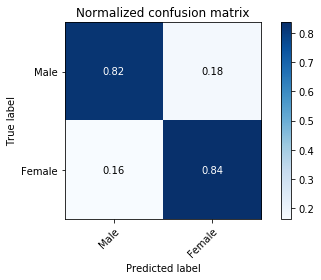

In [37]:
explore_data.plot_confusion_matrix(val_target, descr_pred_df['pred_combo'], classes, normalize=True)

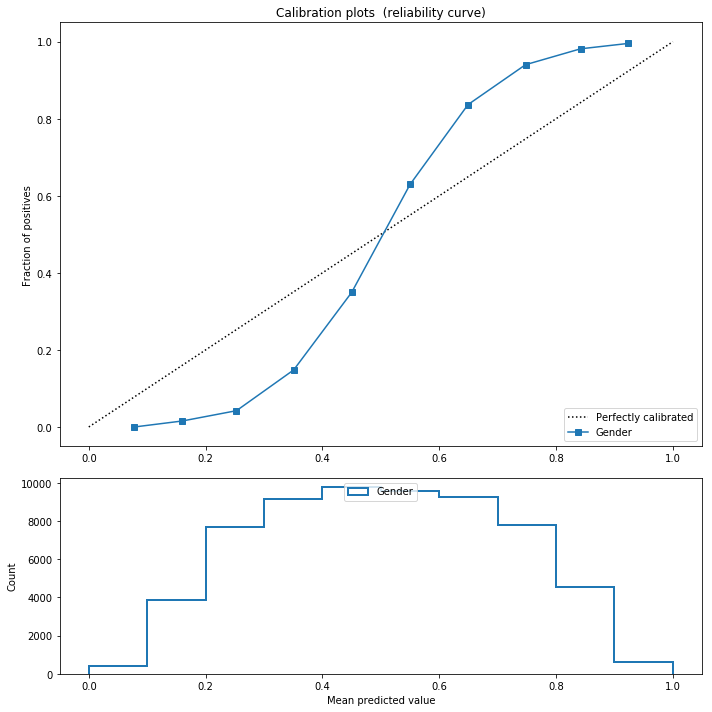

In [38]:
explore_data.plot_calibration_curve(val_target, descr_pred_df['pred_probs_combo'], 'Gender')

In [39]:
reload(explore_data)
# checking the ratios of demo variables in low-mid-high probability buckets
explore_data.check_bin_probs_distr(descr_pred_df['pred_probs_combo'], 
                                   val_ids, 
                                   descr_df.set_index('speech_id'))

Validation sample means:
      Gender_F  Ethinicity_NW     AvgAge   Party_D  Chamber_H  AvgWordCount
base       0.5       0.173991  58.285477  0.621468   0.659816     387.29868


,Gender_F,Ethinicity_NW,AvgAge,Party_D,Chamber_H,AvgWordCount
0.4,0.16,0.42,0.99,0.82,0.79,0.95
0.6,0.98,0.92,0.99,0.97,1.04,0.94
1.0,1.81,1.63,1.01,1.20,1.17,1.10


In [184]:
reload(explore_data)
explore_data.compare_ngrams(val_list, descr_pred_df['pred_probs_combo'], 
                            ngram_range=(1, 1),
                            top_k=20)


Top 20 ngrams by differentiating score:


,ngram,<0.4,<0.6,<1.0,score
0,ensure,1371.0,2302.0,4086.0,342.0
1,woman,412.0,928.0,2568.0,268.0
2,proud,1310.0,1880.0,3323.0,263.0
3,california,1713.0,2559.0,5396.0,260.0
4,access,1234.0,1941.0,4029.0,248.0
5,ought,2258.0,906.0,544.0,246.0
6,communities,1445.0,2292.0,4395.0,242.0
7,unanimous,2786.0,1902.0,1422.0,237.0
8,womens,140.0,729.0,2521.0,228.0
9,across,1897.0,2411.0,4115.0,211.0


## Congressperson level analysis

In [153]:
speaker_df = descr_pred_df[['Full Name', 'Party', 'State', 'Female', 'NonWhite', 'Age', 'pred_probs_combo']]\
                .groupby(['Full Name', 'Party', 'State', 'Female', 'NonWhite'])\
                .agg({'pred_probs_combo':['mean', 'count'], 'Age': ['mean']})\
                .reset_index()
speaker_df.columns = ['_'.join(col) for col in speaker_df.columns]
speaker_df['Female_pred_'] = speaker_df.pred_probs_combo_mean > 0.5
speaker_df.shape

(1702, 9)

Confusion matrix, without normalization
[[1344  136]
 [   2  220]]
              precision    recall  f1-score   support

        Male       1.00      0.91      0.95      1480
      Female       0.62      0.99      0.76       222

   micro avg       0.92      0.92      0.92      1702
   macro avg       0.81      0.95      0.86      1702
weighted avg       0.95      0.92      0.93      1702



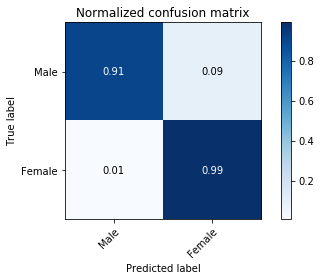

In [154]:
explore_data.plot_confusion_matrix(speaker_df.Female_, speaker_df.Female_pred_, classes, normalize=True)

In [155]:
speaker_df.pred_probs_combo_count.median()

12.0

In [156]:
speaker_med_df = speaker_df[speaker_df.pred_probs_combo_count > speaker_df.pred_probs_combo_count.median()]
speaker_med_df.shape

(818, 9)

Confusion matrix, without normalization
[[609   9]
 [  0 200]]
              precision    recall  f1-score   support

        Male       1.00      0.99      0.99       618
      Female       0.96      1.00      0.98       200

   micro avg       0.99      0.99      0.99       818
   macro avg       0.98      0.99      0.99       818
weighted avg       0.99      0.99      0.99       818



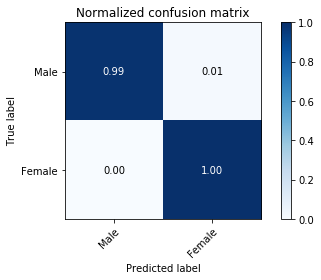

In [157]:
explore_data.plot_confusion_matrix(speaker_med_df.Female_, speaker_med_df.Female_pred_, classes, normalize=True)

In [158]:
tp = np.argmax(speaker_med_df[speaker_med_df.Female_==1].pred_probs_combo_mean.values)
speaker_med_df[speaker_med_df.Female_==1].iloc[tp]

Full Name_                CLARK, KATHERINE
Party_                                   D
State_                                  MA
Female_                                  1
NonWhite_                                0
pred_probs_combo_mean             0.728266
pred_probs_combo_count                  13
Age_mean                           52.8462
Female_pred_                          True
Name: 285, dtype: object

In [159]:
tn = np.argmin(speaker_med_df[speaker_med_df.Female_==0].pred_probs_combo_mean.values)
speaker_med_df[speaker_med_df.Female_==0].iloc[tn]

Full Name_                MATTINGLY, MACK
Party_                                  R
State_                                 GA
Female_                                 0
NonWhite_                               0
pred_probs_combo_mean            0.259242
pred_probs_combo_count                 13
Age_mean                          53.3077
Female_pred_                        False
Name: 1022, dtype: object

In [160]:
fp = np.argmax(speaker_med_df[speaker_med_df.Female_==0].pred_probs_combo_mean.values)
speaker_med_df[speaker_med_df.Female_==0].iloc[fp]

Full Name_                COLEMAN, NORM
Party_                                R
State_                               MN
Female_                               0
NonWhite_                             0
pred_probs_combo_mean          0.542726
pred_probs_combo_count               14
Age_mean                        57.2857
Female_pred_                       True
Name: 310, dtype: object

In [161]:
fn = np.argmin(speaker_med_df[speaker_med_df.Female_==1].pred_probs_combo_mean.values)
speaker_med_df[speaker_med_df.Female_==1].iloc[fn]

Full Name_                MARTIN, LYNN
Party_                               R
State_                              IL
Female_                              1
NonWhite_                            0
pred_probs_combo_mean          0.52326
pred_probs_combo_count              93
Age_mean                       47.5806
Female_pred_                      True
Name: 1010, dtype: object

## Congress level analysis

In [143]:
congress_df = descr_pred_df[['Congress', 'Female', 'pred_probs_combo', 'pred_combo']]\
                .groupby('Congress')\
                .agg({'Female': ['mean', 'sum'], 'pred_combo': ['mean']})\
                .reset_index()
congress_df.columns = ['_'.join(col) for col in congress_df.columns]
congress_df['Prediction_balance'] = congress_df.pred_combo_mean / congress_df.Female_mean
congress_df.shape

(18, 5)

In [144]:
congress_df.head()

,Congress_,Female_mean,Female_sum,pred_combo_mean,Prediction_balance
0,97,0.180764,530.0,0.210437,1.164151
1,98,0.220996,661.0,0.243731,1.102874
2,99,0.244430,757.0,0.260575,1.066050
3,100,0.224104,675.0,0.254648,1.136296
4,101,0.293460,866.0,0.325991,1.110855


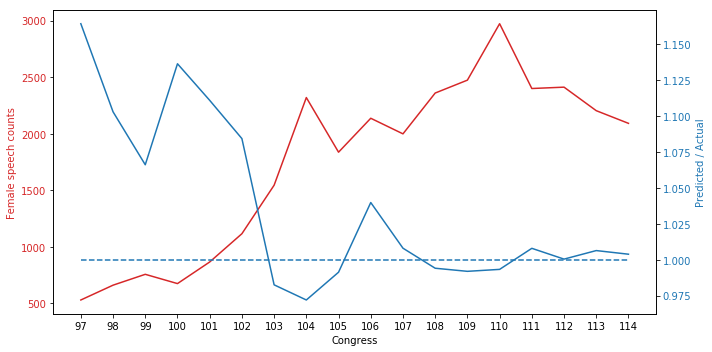

In [151]:
fig, ax1 = plt.subplots(figsize=(10, 5))

color = 'tab:red'
ax1.set_xlabel('Congress')
ax1.set_ylabel('Female speech counts', color=color)
ax1.plot(congress_df.Congress_, congress_df.Female_sum, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Predicted / Actual', color=color)  # we already handled the x-label with ax1
ax2.plot(congress_df.Congress_, congress_df.Prediction_balance, color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax2.hlines(y=1,xmin=97,xmax=114, color=color, linestyles='dashed')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.xticks(range(97,115))
plt.show()